In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.font_manager._rebuild()

출처 : https://www.kaggle.com/competitions/spaceship-titanic/data

### 각 칼럼 설명
- PassengerId: 각 승객에 대한 고유 ID입니다. 각 ID는 승객이 함께 여행하는 그룹 gggg_pp을 gggg나타내며 그룹 pp내 번호입니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.  
- HomePlanet: 승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.  
- CryoSleep: 냉동수면 여부. cryosleep의 승객은 객실에 국한됩니다.  
- Cabin: 승객이 머물고 있는 객실 번호. 형식을 취합니다 . deck/num/side 여기서 P는 Port를, S는 Starboard  
- Destination: 승객이 출발할 행성입니다.  
- Age: 승객의 나이  
- VIP: 승객이 항해 중 특별 VIP 서비스를 지불했는지 여부.  
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 우주선 타이타닉 의 다양한 고급 편의 시설에 대해 청구한 금액 입니다.  
- Name: 승객의 성과 이름.  
- Transported: 승객이 다른 차원으로 이송되었는지 여부. 이것은 예측하려는 대상인 열입니다.  

In [306]:
train_data = pd.read_csv('Data_Set/spaceship-titanic/train.csv')
test_data = pd.read_csv('Data_Set/spaceship-titanic/test.csv')

In [307]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [308]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [309]:
#기술 통계 확인 
#나이를 제외하고 전부 category라서 확인이 안됨
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [310]:
# test_data.info()

In [311]:
def pie_chart(feature):
    feature_value = train_data[feature].value_counts(sort = True)
    feature_size = feature_value.size
    feature_index = feature_value.index
    survived = train_data[train_data['Transported'] == True][feature].value_counts()
    dead = train_data[train_data['Transported'] == False][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_value, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + ' percentage')
    plt.show()
    
    for index, value in enumerate(feature_index):
        plt.figure(figsize=(20, 30))
        plt.subplot(1, feature_size + 1, index + 1,aspect = 'equal')
        plt.pie([survived[value], dead[value]], labels=['생존', '사망'], autopct='%1.1f%%') #원크기 : radius
        plt.title(str(value)) #  + '\'s 생존여부'
    
    plt.show()

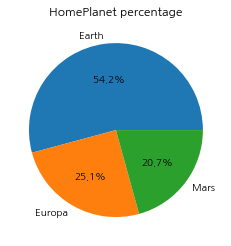

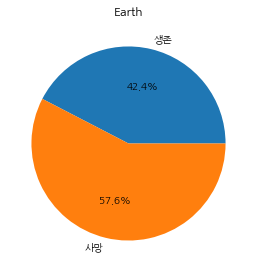

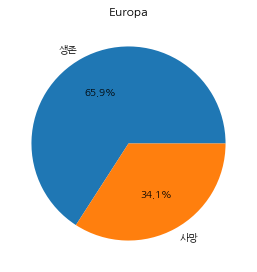

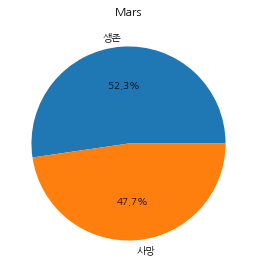

In [312]:
pie_chart('HomePlanet')
#유로파가 많이 살아남은듯

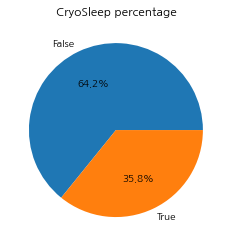

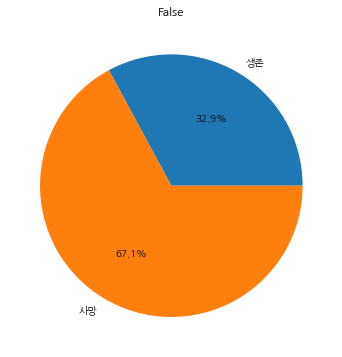

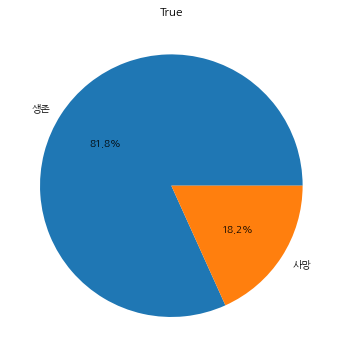

In [313]:
pie_chart('CryoSleep')
#냉동 수면을 하고 있던 사람들은 많이 살아남은듯?

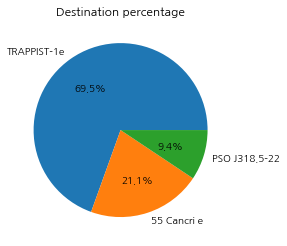

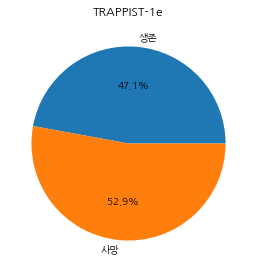

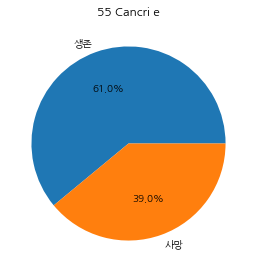

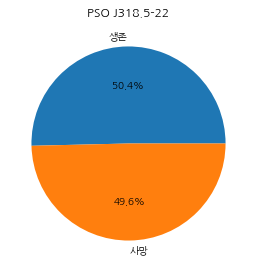

In [314]:
pie_chart('Destination')
#출발 위치 - 생각보다 큰 영향을 미친 것 같진 않음
# 55 행성에서 출발한 사람들은 많이 살아남음

In [315]:
# train_data.Cabin.value_counts()
#의미가 없는 거 같은데

In [316]:
def bar_chart(feature):
    survived = train_data[train_data['Transported'] == True][feature].value_counts()
    dead = train_data[train_data['Transported'] == False][feature].value_counts()
    
    temp = pd.DataFrame([survived,dead])
    temp.index = ['survived', 'dead']
    temp.plot(kind = 'bar', stacked = False, figsize = (20,10))

In [317]:
#카테고리로 바꿔야 괜찮을지도?
#bar_chart('Age') 

In [318]:
train_data['Name'].head(5)
#특이한 건 없는 것 같은데, 성이 같은 사람들끼리 조사해서 같은 성씨인 사람들이 얼마나 살아남았는지를 체크해보자.

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

In [319]:
#성씨가 연관이 있을까?
data = [train_data, test_data]
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('\ ([A-Za-z]+)')

In [320]:
#생략 안되도록 만들기(row)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options
# https://star-crab.tistory.com/19
pd.set_option('display.max_rows', None)

In [321]:
#생각보다 성씨가 엄청 많네?
print(len(train_data['Title'].value_counts()))

2213


In [322]:
pd.crosstab(train_data['Title'], train_data['Transported'])

Transported,False,True
Title,,
Acobson,3,1
Acobsond,2,1
Adavisons,5,4
Adkinson,3,0
Admingried,1,3
Ageurante,0,1
Aginge,0,1
Ailled,1,1
Aillyber,1,2


In [323]:
#가족별 생존 비율 확인
familyData = train_data['Transported'].groupby(train_data['Title']).size()
familyServived = train_data[train_data['Transported'] == True].groupby(train_data['Title']).size()

#가족별 생존자 / 전체 인원
familySurvivedRate = familyServived.astype(float)/familyData.astype(float)
familySurvivedRate = familySurvivedRate.fillna(0) #모두 죽은 가족은 null -> 0처리
familySurvivedRate.mean() #평균적인 생존 확률 : 51퍼, 별로 연관성이 없다는 것을 알 수 있음

0.5179028858875216

In [324]:
train_data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [325]:
#데이터 일부 선택, 이후 파일로 분리할 예정
# train_data= train_data[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','Transported']]
# test_data= test_data[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age']]
#데이터 보간을 위한 갯수 확인
train_data.isnull().sum()
#각 칼럼별로 참고할 수 있는 데이터가 있는가?
train_data[train_data['Name'].isnull()] # null인 애들만 조사

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Title
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False,NaN
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,NaN
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True,NaN
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,NaN
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,NaN
126,0136_01,Earth,False,G/23/S,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False,NaN
165,0190_01,Earth,True,G/32/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False,NaN
297,0330_02,Europa,False,C/14/S,TRAPPIST-1e,32.0,False,247.0,4651.0,0.0,46.0,202.0,NaN,True,NaN
305,0337_03,Mars,False,F/63/S,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,NaN
331,0372_01,Earth,False,F/85/P,TRAPPIST-1e,24.0,False,0.0,5.0,0.0,2766.0,0.0,NaN,False,NaN


In [326]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Title
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines


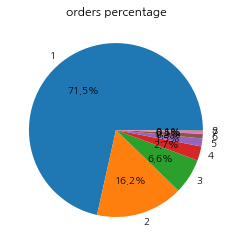

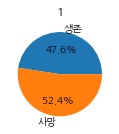

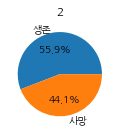

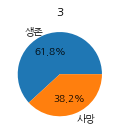

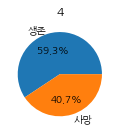

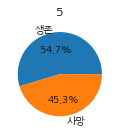

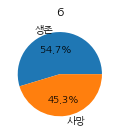

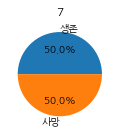

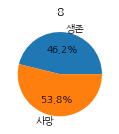

In [327]:
#여기는 passneger id와 관련이 있는지 조사 
train_data['familyNum'] = train_data.PassengerId.str.split('_').str[0].astype(int)
train_data['orders'] = train_data.PassengerId.str.split('_').str[1].astype(int)

#이름을 기준으로 비교해본 결과 일치하지 않음 = 관련이 없음
# train_data['Title'].value_counts().sort_values(ascending=False)

#일부는 가능성이 있음
pie_chart('orders') 

In [329]:
#cabin 나누기
train_data['Cabin1'] = train_data.Cabin.str.split('/').str[0]
train_data['Cabin2'] = train_data.Cabin.str.split('/').str[1]#.astype(int) - 이건 그 뭐냐 null 잡고 처리
train_data['Cabin3'] = train_data.Cabin.str.split('/').str[2]

#시각화 하기 전 value가 몇개나 있는지 확인
print(len(train_data['Cabin1'].value_counts())) #카테고리형
print(len(train_data['Cabin2'].value_counts())) #거의 연속형
print(len(train_data['Cabin3'].value_counts())) #카테고리형

8
1817
2


In [ ]:
pie_chart('Cabin3')

In [ ]:
train_data.corr()